Import necessary packages.

In [1]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
import matplotlib.pyplot as plt
# set sympy output to print pretty math expressions
init_printing()

# 1. Setup

## payoff matrix

We set up a simple payoff matrix below following Chiappori et al.

To tell markdown this is a table, we use html script, we must 
* use pipes `|` to mark the separation between columns
* use `---` in each cell on the second row to indicate the row above is the title row
* make sure each row has the same number of columns

<div style="text-align: center;">

|              |       | **Goalie** |       |       |
| --------     | ----- | -------- | ----- | ----- |
|              |       | left     | center | right |
|              | left  | ($P_L$,$-P_L$)    | ($\pi_L$,$-\pi_L$) | ($\pi_L$,$-\pi_L$) |
| **Kicker** | center | ($\mu$,$-\mu$)    | (0,0) | ($\mu$,$-\mu$) |
|              | right | ($\pi_R$,$-\pi_R$)    | ($\pi_R$,$-\pi_R$) | ($P_R$,$-P_R$) |
    


**Assumptions**
* (SC; "sides and center'') $\pi_R > P_L$, $\pi_L > P_R$
* (SC'; "sides and center'') $\pi_R > \mu$, $\pi_L > \mu$
* (NS; "natural side'') $\pi_L \geq \pi_R$, $P_L \geq P_R$
* (KS; "kicker's side'') $\pi_R - P_R \geq \pi_L - P_L$

# 2. Characterizing the equilibrium

## The mixed-strategy N.E.

Denote kicker (goalie)'s probability of playing left by $k_L$ ($g_L$) and right by $k_R$ ($g_R$) respectively.

### Characterize payoffs

Under these strategies, the *expected* payoffs of each player are
\begin{align}
    Ev_k &= \underbrace{k_L g_L \cdot P_L}_{(L,L)} + \underbrace{k_L (1-g_L-g_R) \cdot \pi_L}_{(L,C)} + \underbrace{k_L g_R \cdot \pi_L}_{(L,R)} \\
    &\qquad + \underbrace{(1-k_L-k_R) g_L \cdot \mu}_{(C,L)} + \underbrace{(1-k_L-k_R) (1-g_L-g_R) \cdot 0}_{(C,C)} + \underbrace{(1-k_L-k_R) g_R \cdot \mu}_{(C,R)} \\
    &\qquad + \underbrace{k_R g_L \cdot \pi_R}_{(R,L)} + \underbrace{k_R (1-g_L-g_R) \cdot \pi_R}_{(R,C)} + \underbrace{k_R g_R \cdot P_R}_{(R,R)} 
\end{align}

Similarly,
\begin{align}
    Ev_g &= -Ev_k
\end{align}

### Pure strategy NE

Claim: there is no pure-strategy NE in this game.

(fill in this part yourself)

### Derive mixed-strategy best responses

We will rely on sympy to help with the algebra.

In [2]:
# define necessary notations
kL, kR, gL, gR, PL, PR, piL, piR, mu = symbols('k_L k_R g_L g_R P_L P_R pi_L pi_R mu', positive=True)

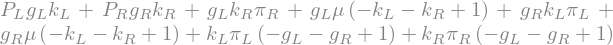

In [33]:
# define expected payoffs
vk = kL*gL*PL + kL*(1-gL-gR)*piL + kL*gR*piL + (1-kL-kR)*gL*mu + (1-kL-kR)*(1-gL-gR)*0 + (1-kL-kR)*gR*mu + kR*gL*piR + kR*(1-gL-gR)*piR + kR*gR*PR
vg = -vk

# show vk
vk

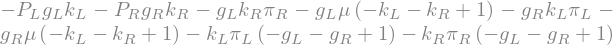

In [35]:
# show vg
vg

### Kicker's best responses $\rightarrow (g_L, g_R)$

Kicker's best response is to choose their strategy $(k_L,k_R)$ to maximize the payoff $E v_k$ given their belief of $(g_L,g_R)$. For notational simplicity, we don't use the hat notations here, and also use $(g_L,g_R)$ to denote the kicker's beliefs about goalie'strategies. 

The maximization problem is therefore
$$\max_{k_L,k_R} E v_k $$

The first-order derivative is

In [20]:
# take derivative of vk w.r.t. kL and kR, respectively, and simplify
(vk.diff(kL).simplify(), vk.diff(kR).simplify())

Note that the derivatives are not functions of $k_L$ and $k_R$, but functions of $g_L$ and $g_R$. 

There is a mixed-strategy best response in $(k_L, k_R)$ only if both derivatives above are 0, i.e., kicker is indifferent among all responses in $(k_L, k_R)$. 

Thus we try to find beliefs of $(g_L, g_R)$ such that the above FOCs are zero.

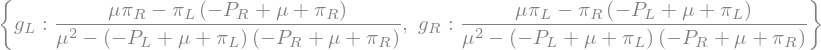

In [21]:
# solve for beliefs of (gL, gR) such that kicker's FOCs are zero
g_sol = solve((vk.diff(kL).simplify(), vk.diff(kR).simplify()), gL,gR)
# show the solution
g_sol

These are unconstrained solutions. However, by definition of $(g_L, g_R)$, these values are probabilities, thus must be 
* $g_L \geq 0, g_R \geq 0$;
* $g_L + g_R \leq 1$

Next, we check these two constraints separately.

**Claim 1:** values of $g_L, g_R$ are greater than 0. 

**Proof** 

To show this claim, we analyze the numerator and denominators separately.

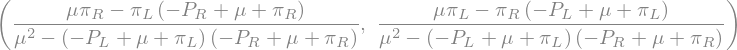

In [22]:
# extract solution
gL_sol = g_sol[gL].simplify()
gR_sol = g_sol[gR].simplify()
(gL_sol, gR_sol)

In [24]:
# extract numerator and denominator separately
n_gL,d_gL =fraction(gL_sol)
(n_gL, d_gL)

The denominator of $g_L$ is always negative. To see that:
\begin{align}
    \mu^{2} - (- P_{L} + \mu + \pi_{L}) (- P_{R} + \mu + \pi_{R}) &= 
        \mu^{2} - \underbrace{(\overbrace{\pi_{L} - P_{L}}^{>0 \text{ by def}} + \mu)) }_{> \mu} \underbrace{(\overbrace{\pi_{R} - P_{R}}^{>0 \text{ by def}} + \mu) }_{> \mu} < 0
\end{align}


The numerator of $g_L$ is also always negative. To see that:
\begin{align}
    \mu \pi_R - \pi_L(-P_R + \mu + \pi_R) &= 
        \mu \pi_R - \pi_L (\pi_R - P_R + \mu) \\
        &= \mu \pi_R - \mu \pi_L - \pi_L (\pi_R - P_R) \\
        &= \mu \underbrace{(\pi_R - \pi_L)}_{<0 \text{ by Assmp. NS}} - \pi_L \underbrace{(\pi_R - P_R)}_{>0 \text{ by def}} < 0
\end{align}

The denominator of $g_R$ is the same as $g_L$, and is always negative. 

In [25]:
# extract numerator and denominator separately
n_gR,d_gR =fraction(gR_sol)
(n_gR, d_gR)

The numerator of $g_R$ is also always negative. To see that:
\begin{align}
    \mu \pi_L - \pi_R(-P_L + \mu + \pi_L) &= 
        \mu \pi_L - \pi_R (\pi_L - P_L + \mu) \\
        &= \mu \pi_L - \mu \pi_R - \pi_R (\pi_L - P_L) \\
        &= \mu (\pi_L - \pi_R) - \pi_R (\pi_L - P_L) \\
        &< \mu (\pi_L - \pi_R) - \mu (\pi_L - P_L)  && \text{by Assump. SC'} \\
        &= \mu (P_L - \pi_R) < 0  && \text{by Assump. SC} 
\end{align}

Because the numerator and denominators are both negative, thus $g_L>0$ and $g_R>0$.

We have thus proved Claim 1. 

$\square$

**Claim 2:** $g_L + g_R < 1$ if and only if $\mu < \frac{\pi_L \pi_R - P_L P_R}{\pi_L + \pi_R - P_L - P_R}$; otherwise $g_L + g_R = 1$.

$g_L + g_R < 1$ if and only if the sum of their numerators is less than their common denominator.

In [27]:
simplify(n_gL + n_gR - d_gL)

In other words, $g_L + g_R < 1$ if and only if
\begin{align}
    P_L P_R - P_L \mu - P_R \mu + \mu \pi_L + \mu \pi_R - \pi_L \pi_R &< 0 \\
    \mu (\pi_L + \pi_R - P_L - P_R ) &<  \pi_L \pi_R - P_L P_R \\
    \mu &< \frac{\pi_L \pi_R - P_L P_R}{\pi_L + \pi_R - P_L - P_R}
\end{align}

Otherwise if $\mu \geq \frac{\pi_L \pi_R - P_L P_R}{\pi_L + \pi_R - P_L - P_R}$, the $g_L$ and $g_K$ values must be restricted at $g_L + g_K = 1$ by their definition as mixed strategies. 

We have thus proved claim 2. 

$\square$

### Goalie's best responses $\rightarrow (k_L, k_R)$

Goelie's best response is to choose their strategy $(g_L,g_R)$ to maximize the payoff $E v_g$ given their belief of $(k_L,k_R)$. For notational simplicity, we don't use the hat notations here, and also use $(k_L,k_R)$ to denote the goalie's beliefs about kicker'strategies. 

The maximization problem is therefore
$$\max_{g_L,g_R} E v_g $$

The first-order derivative is

In [28]:
# take derivative of vk w.r.t. kL and kR, respectively, and simplify
(vg.diff(gL).simplify(), vg.diff(gR).simplify())

Similarly, note that the derivatives are not functions of $g_L$ and $g_R$, but functions of $k_L$ and $k_R$. 

There is a mixed-strategy best response in $(g_L, g_R)$ only if both derivatives above are 0, i.e., goalie is indifferent among all responses in $(g_L, g_R)$. 

Thus we try to find beliefs of $(k_L, k_R)$ such that the above FOCs are zero.

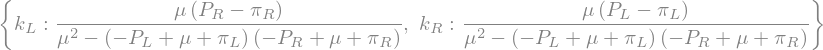

In [34]:
# solve for beliefs of (gL, gR) such that kicker's FOCs are zero
k_sol = solve((vg.diff(gL).simplify(), vg.diff(gR).simplify()), kL,kR)
# show the solution
k_sol

We can make similarly claims here as Claims 1 and 2 above about the values of $(k_L, k_R)$. 

**Claim 3:**
* both values are greater than 0
* $k_L + k_R = 1$! (different from Proposition 1 in paper!!!) 

**Proof**

The first part follows similarly as claim 1. Note that the denominator is the same as before, which is always negative. The numerators here are always negative as well. 

We check the second part:

In [32]:
# extract numerator and denominator separately
n_kL,d_kL =fraction(k_sol[kL])
n_kR,d_kR =fraction(k_sol[kR])

# calculate the sum of numerators of n_kL,d_kL and subtract their common denominator
simplify(n_kL + n_kR - d_kL)

The sum of numerators of $(k_L,k_R)$ minus their common denominar is 
\begin{align}
    P_L P_R - P_L \pi_R - P_R \pi_L + \pi_L \pi_R &= - P_L(\pi_R - P_R) + \pi_L(\pi_R - P_R) \\
        &= (\pi_R - P_R)(\pi_L - P_L) > 0
\end{align}
which implies that $k_L + k_R \geq 1$, so that the probabilities must always be constrained to $k_L + k_R = 1$, thus goalie never places probability on C!!! 

This result is different from what's stated in Proposition 1 in the paper. 

**Q:** Did I make any mistakes?

### Compare to Proposition 1 in paper

**Proposition 1** 

Claims 1 and 2 together verifies Proposition 1 in the paper about kicker's strategy. 

Claims 3 does not verify Proposition 1 about the goalie's strategy.

# 3. Analysis

### Challenge

You can try to explore the properties of the equilibrium by
* plotting the mixed strategies as functions of exogenous variables
* conduct comparative statics